In [39]:
###############################################
# Load some useful modules
###############################################

import os,sys

#for netcdf files
from netCDF4 import Dataset

#for numeric functions
import numpy as np

#plotting functions
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter

## Plot mean SSH for the gyre

In [40]:
def mean_ssh(ncfile_avg):

    ncfile = ncfile_avg[:-6] + 'his.nc'
    nc = Dataset(ncfile, 'r')
    nc_avg = Dataset(ncfile_avg, 'r')

    x = nc.variables['x_rho'][:,:]*1e-3
    y = nc.variables['y_rho'][:,:]*1e-3
    zeta = nc_avg.variables['zeta'][-1,:,:]

    print(nc_avg.variables['scrum_time'][-1]/(360*24*3600))

    nc.close()
    nc_avg.close()

    plt.contourf(x,y,zeta,100,cmap=plt.cm.jet); 
    CS1=plt.contour(x,y,zeta,10,colors = ('k',)); 

    plt.clabel(CS1, fmt = '%2.2f', colors = 'k', fontsize=6)  ; 
    plt.xlabel(r'x [km]',fontsize=18)
    plt.ylabel(r'y [km]',fontsize=18)
    plt.title(r'SSH',verticalalignment='bottom', fontsize=20)



7.500154320987654


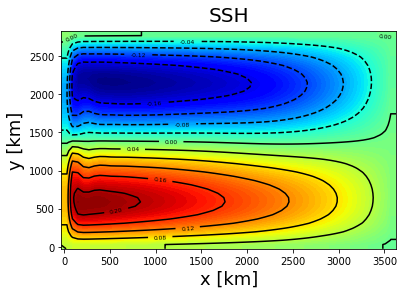

In [41]:
folder = '/net/libra/local/tmp/1/gula/ROMS/roms_for_ModNum/2021/'
ncfile_avg = folder + 'case1/basin_avg.nc'
mean_ssh(ncfile_avg)


## Define some plotting functions

In [42]:
#define a plotting function once
fontsize0 = 6
fontsize1 = 10
fontsize2 = format(14)
fontsize3 = format(18)
font = {'size'   : fontsize1}
plt.rc('font', **font)

def plot_common(ax1,x,y,myvar,title,panel):
    my_cmap= plt.cm.bwr
    levels = np.arange(-1,1.01,0.01)
    joe = plt.pcolormesh(x,y,myvar,vmin=levels.min(),vmax=levels.max(),cmap=my_cmap,rasterized=True);
    t1 = plt.text(0.9, 0.21,"{0:.1f}".format(np.nansum(myvar[:,:])), fontsize=fontsize0,  horizontalalignment='right', verticalalignment='center', transform = ax1.transAxes)
    t1 = plt.text(0.9, 0.11,title, fontsize=fontsize1,  horizontalalignment='right', verticalalignment='center', transform = ax1.transAxes)
    ax1.xaxis.set_major_formatter( NullFormatter() )
    ax1.yaxis.set_major_formatter( NullFormatter() )
    plt.axis([x.min(), x.max(), y.min(), y.max()])
    return joe

def panels9(x,y,var1,var2,var3,var4,var5,var6,var7,var8,var9,coeflev=0.5e-9,titles=[' ']*10,title=' ',wbc=False):
    if wbc: fig = plt.figure(figsize=(6.0,6.0)); 
    else: fig = plt.figure(figsize=(12.0,8.0)); 
    ############################################################
    ax1 = fig.add_subplot(331,facecolor='Gainsboro')    
    joe = plot_common(ax1,x,y,var1/coeflev,titles[0],'a')
    ############################################################
    ax1 = fig.add_subplot(332,facecolor='Gainsboro')
    plt.title(title)
    plot_common(ax1,x,y,var2/coeflev,titles[1],'b')
    ############################################################
    ax1 = fig.add_subplot(333,facecolor='Gainsboro')    
    plot_common(ax1,x,y,var3/coeflev,titles[2],'c')
    ############################################################
    ax1 = fig.add_subplot(334,facecolor='Gainsboro')
    plot_common(ax1,x,y,var4/coeflev,titles[3],'d')
    ############################################################
    ax1 = fig.add_subplot(335,facecolor='Gainsboro')    
    plot_common(ax1,x,y,var5/coeflev,titles[4],'e')
    ############################################################
    ax1 = fig.add_subplot(336,facecolor='Gainsboro')    
    plot_common(ax1,x,y,var6/coeflev,titles[5],'f')
    ############################################################
    ax1 = fig.add_subplot(337,facecolor='Gainsboro')    
    plot_common(ax1,x,y,var7/coeflev,titles[6],'g')
    ############################################################
    ax1 = fig.add_subplot(338,facecolor='Gainsboro')
    plot_common(ax1,x,y,var8/coeflev,titles[7],'h')
    ############################################################
    ax1 = fig.add_subplot(339,facecolor='Gainsboro')
    plot_common(ax1,x,y,var9/coeflev,titles[8],'i')    
    ############################################################
    plt.subplots_adjust(right=0.9)
    plt.subplots_adjust(wspace=0.01,hspace=0.01)
    cbar_ax = fig.add_axes([0.94, 0.32, 0.02, 0.30])
    fig.colorbar(joe, cax=cbar_ax) 
    ############################################################


## Define vorticity balance

In [43]:
#TEST

ncfile = folder + 'case1/basin_diags_vrt_avg.nc'

nc = Dataset(ncfile,'r')
[nt0,ny,nx] = nc.variables['vrt_hdiff'].shape
nt = nt0-1

print(nc.variables['vrt_hdiff'][-nt:,:,:].shape)


(1, 51, 61)


In [44]:
def bilan(ncfile,coeflev=0.5e-9):

    nc = Dataset(ncfile,'r')
    [nt0,ny,nx] = nc.variables['vrt_hdiff'].shape
    
    if nt0>100:
        nt = np.max([nt0-20,1])
    else:
        nt = np.max([nt0-2,1])
 
    vrt_hdiff = np.nanmean(nc.variables['vrt_hdiff'][-nt:,:,:],0)
    vrt_adv = np.nanmean(nc.variables['vrt_xadv'][-nt:,:,:],0) + np.nanmean(nc.variables['vrt_yadv'][-nt:,:,:],0) - vrt_hdiff
    vrt_cor = np.nanmean(nc.variables['vrt_cor'][-nt:,:,:],0)
    vrt_prsgrd = np.nanmean(nc.variables['vrt_prsgrd'][-nt:,:,:],0)
    vrt_hmix = np.nanmean(nc.variables['vrt_hmix'][-nt:,:,:],0)
    vrt_vmix = np.nanmean(nc.variables['vrt_vmix'][-nt:,:,:],0)
    vrt_Wind = np.nanmean(nc.variables['vrt_wind'][-nt:,:,:],0)
    vrt_Drag = np.nanmean(nc.variables['vrt_drag'][-nt:,:,:],0)
    
    y = np.arange(vrt_hdiff.shape[0])
    x = np.arange(vrt_hdiff.shape[1])

    mytime0 = nc.variables['scrum_time'][-nt]/(360*24*3600)
    mytime = nc.variables['scrum_time'][-1:]/(360*24*3600)
    print('averaged between ' + format(mytime0) + ' and ' + format(mytime) + ' years')
    
    vrt_tot = vrt_adv + vrt_hdiff+ vrt_cor + vrt_prsgrd + vrt_hmix + vrt_vmix
    titles = ['Adv', 'Cor', 'Pressure', 'Explicit visc.', 'Interior vert. mix.',\
                         'Implicit visc.', 'Wind', 'Bot. Drag','$\sum$']
    title='barotropic vorticity tendency'
    panels9(x,y,vrt_adv, vrt_cor, vrt_prsgrd, vrt_hmix, vrt_vmix-vrt_Wind-vrt_Drag,\
              vrt_hdiff, vrt_Wind, vrt_Drag,vrt_tot,coeflev=coeflev,titles=titles,title=title)

    
def bilan_wbc(ncfile,coeflev=1.e-8):

    nc = Dataset(ncfile,'r')
    [nt0,ny,nx] = nc.variables['vrt_hdiff'].shape
    
    if nt0>100:
        nt = np.max([nt0-20,1])
    else:
        nt = np.max([nt0-2,1])
    
    y = np.arange(ny//2)
    x = np.arange(nx//4)
    
    vrt_hdiff = np.nanmean(nc.variables['vrt_hdiff'][-nt:,:ny//2,:nx//4] ,0)
    vrt_adv = np.nanmean(nc.variables['vrt_xadv'][-nt:,:ny//2,:nx//4],0)\
            + np.nanmean(nc.variables['vrt_yadv'][-nt:,:ny//2,:nx//4],0) - vrt_hdiff
    vrt_cor = np.nanmean(nc.variables['vrt_cor'][-nt:,:ny//2,:nx//4],0)
    vrt_prsgrd = np.nanmean(nc.variables['vrt_prsgrd'][-nt:,:ny//2,:nx//4],0)
    vrt_hmix = np.nanmean(nc.variables['vrt_hmix'][-nt:,:ny//2,:nx//4],0)
    vrt_vmix = np.nanmean(nc.variables['vrt_vmix'][-nt:,:ny//2,:nx//4],0)
    vrt_Wind = np.nanmean(nc.variables['vrt_wind'][-nt:,:ny//2,:nx//4],0)
    vrt_Drag = np.nanmean(nc.variables['vrt_drag'][-nt:,:ny//2,:nx//4],0)

    mytime0 = nc.variables['scrum_time'][-nt]/(360*24*3600)
    mytime = nc.variables['scrum_time'][-1:]/(360*24*3600)
    #print 'averaged between ' + format(mytime0) + ' and ' + format(mytime) + ' years'
    
    
    vrt_tot = vrt_adv + vrt_hdiff+ vrt_cor + vrt_prsgrd + vrt_hmix + vrt_vmix
    titles = ['Adv', 'Cor', 'Pressure', 'Explicit visc.', 'Interior vert. mix.',\
                         'Implicit visc.', 'Wind', 'Bot. Drag','$\sum$']
    title = 'barotropic vorticity tendency for WBC'
    panels9(x,y,vrt_adv, vrt_cor, vrt_prsgrd, vrt_hmix, vrt_vmix-vrt_Wind-vrt_Drag,\
              vrt_hdiff, vrt_Wind, vrt_Drag,vrt_tot,coeflev=coeflev,titles=titles,wbc=True,title=title)

    

def bilan_ke(ncfile,coeflev=1e9):

    nc = Dataset(ncfile,'r')
    [nt0,ny,nx] = nc.variables['ek_hdiff'].shape
    
    if nt0>100:
        nt = np.max([nt0-20,1])
    else:
        nt = np.max([nt0-2,1])
        
    vrt_rate = np.nanmean(nc.variables['ek_rate'][-nt:,:,:] ,0)
    vrt_hdiff = np.nanmean(nc.variables['ek_hdiff'][-nt:,:,:] ,0)
    vrt_adv = np.nanmean(nc.variables['ek_hadv'][-nt:,:,:],0) + np.nanmean(nc.variables['ek_vadv'][-nt:,:,:],0) - vrt_hdiff
    vrt_prsgrd = np.nanmean(nc.variables['ek_Prsgrd'][-nt:,:,:],0) +np.nanmean(nc.variables['ek_cor'][-nt:,:,:],0)
    vrt_hmix = np.nanmean(nc.variables['ek_hmix'][-nt:,:,:],0)
    vrt_vmix = np.nanmean(nc.variables['ek_vmix'][-nt:,:,:],0)+np.nanmean(nc.variables['ek_nudg'][-nt:,:,:],0)
    vrt_Wind = np.nanmean(nc.variables['ek_Wind'][-nt:,:,:],0)
    vrt_Drag = np.nanmean(nc.variables['ek_Drag'][-nt:,:,:],0)
    
    y = np.arange(vrt_hdiff.shape[0])
    x = np.arange(vrt_hdiff.shape[1])

    mytime0 = nc.variables['scrum_time'][-nt]/(360*24*3600)
    mytime = nc.variables['scrum_time'][-1:]/(360*24*3600)
    #print 'averaged between ' + format(mytime0) + ' and ' + format(mytime) + ' years'
    
    
    vrt_tot = vrt_adv + vrt_hdiff+  vrt_prsgrd + vrt_hmix + vrt_vmix
    titles = ['$dE_k$','Adv' , 'Pressure', 'Explicit visc.', 'Interior vert. mix.',\
                         'Implicit visc.', 'Wind', 'Bot. Drag','$\sum$'] #'$\frac{\partial E_k}{\partial t}$']
    title = 'kinetic energy tendency'
    panels9(x,y,vrt_rate,vrt_adv,  vrt_prsgrd, vrt_hmix, vrt_vmix-vrt_Wind-vrt_Drag,\
              vrt_hdiff, vrt_Wind, vrt_Drag,vrt_tot, coeflev=coeflev,titles=titles,title=title)


# Case 1: Gyre with beta effect, strong drag, adv, no-slip

7.500154320987654
averaged between 7.500154320987654 and [7.500154320987654] years


/venv/py3-phyocean/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == '':


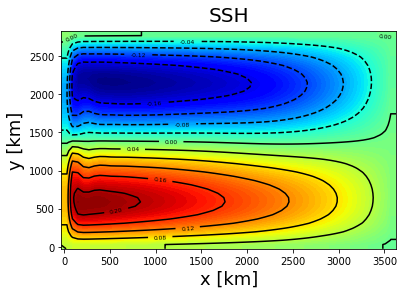

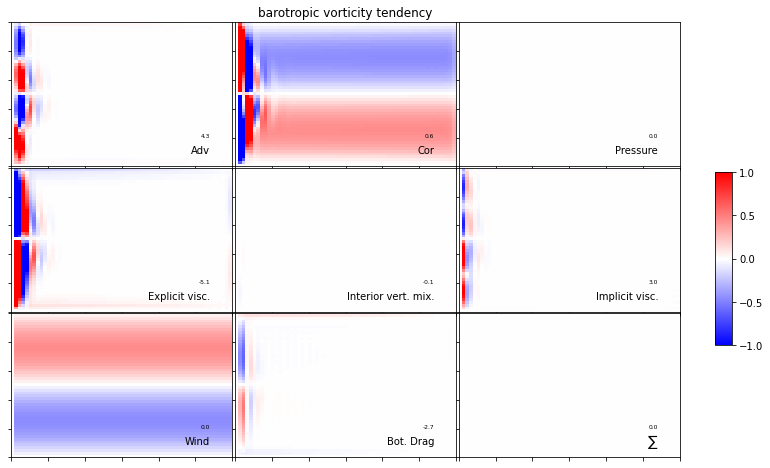

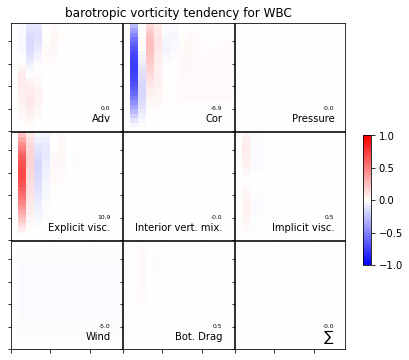

In [45]:
ncfile = folder + 'case1/basin_avg.nc'
mean_ssh(ncfile)
ncfile = folder + 'case1/basin_diags_vrt_avg.nc'
bilan(ncfile); bilan_wbc(ncfile)
#ncfile = folder + 'case1/basin_diags_ek_avg.nc'
#bilan_ke(ncfile,coeflev=1e4)